# Practice Exercise – Preprocessing

The first rule in preprocessing is: **know your data!**

Therefore, you are going to explore your data over several dimensions and views to bring your raw data to a state of processed data, ready to be used for your model.

The **TBLF** approach is suggested:
+ **Try:** Explore the problem (in this case, explore your data)
+ **Broken?:** What is broken? (Do you see something wrong in your data)
+ **Learn:** Why is it wrong? (What is wrong with this data? How can you solve it?)
+ **Fix:** Fix the problem (What can I do to bring the wrong data to an acceptable solution?)

## Business scenario
You are in charge of preprocessing the data your company wants to use in a new machine learning model. The model will be used to predict average influence of a journal, based on journal/publishing information coming from a variety of sources, including researchers, web scraping, and the publishers themselves.

You've received raw data related to the business problem to solve. Your task is to better understand the data using some descriptive statistics. Once you understand the data, you will clean and reshape it. You will use the final processed dataset in your model. 

## Learning objectives
1. Understand a business scenario and corresponding dataset by analyzing the data using descriptive statistics
2. Use visualization tools to support this analysis: 
    - Scatter plots to spot correlations between features 
    - Box and whisker plots and histograms to understand the distribution of your data
3. Use statistics tools to support previous analysis, such as a correlation matrix to quantify those relationships
4. Based on the analysis conclusions, prepare a processed dataset for the model by:
    - Dealing with outliers 
    - Dealing with missing values
    - Cleaning the data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', None)

## Dataset 
The data comes from a variety of sources, including researchers, web scraping, and the publishers themselves. The data has been manipulated to be suited for this preprocessing task.

## Data schema
A dataset on journal/publisher information with estimated-article-influence-scores:
+ journal_name: Name of the journal
+ issn: Unique publication code
+ citation_count_sum: Sum of the number of citations for each journal 
+ paper_count_sum: Sum of the number of papers for each journal
+ avg_cites_per_paper: Average number of citations per paper
+ ranking: Artificial label created for the exercise (possible values: A, B, C, D)
+ proj_ai: Projected average influence

Start by loading the file.

In [3]:
df_journals = pd.read_csv("estimated-article-influence-scores-Exerc2.csv", sep=";")
del df_journals["Unnamed: 0"]

## First glance at your data

#### Learn
How many features do you have?

In [4]:
print("Number of features: {}".format(df_journals.shape[1]))

Number of features: 7


How many samples do you have?

In [5]:
print("Number of samples: {}".format(df_journals.shape[0]))

Number of samples: 3615


> ### Question 1
> #### Try
> Print the first 10 rows to see what the data looks like. Apply the `head` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head)) to your dataset.

In [6]:
# Enter your code here
df_journals.head(10)

,issn,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,ranking,proj_ai
0,2092-6731,3d research,151.0,106.0,1.424528,D,0.290
1,1530-9932,aaps pharmscitech,2208.0,801.0,2.756554,D,0.665
2,1687-0409,abstract and applied analysis,3005.0,2923.0,1.028053,B,0.192
3,1545-7230,academic psychiatry,537.0,490.0,1.095918,NaN,0.208
4,1936-4709,academic questions,40.0,67.0,0.597015,A,0.097
5,1432-0517,accreditation and quality assurance,255.0,331.0,0.770393,A,0.134
6,1839-2571,acoustics australia,30.0,25.0,1.200000,D,0.234
7,2199-6067,acrocephalus,9.0,15.0,0.600000,C,0.098
8,1846-0453,acta adriatica,28.0,37.0,0.756757,NaN,0.131
9,1854-1941,acta agriculturae slovenica,71.0,97.0,0.731959,C,0.125


## Dealing with missing values
#### Learn
Check how many values are missing for each column.

The **isnull()** command returns **True** for each cell of the dataset that is missing a value.

In [7]:
df_journals.isnull().head(10)

,issn,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,ranking,proj_ai
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False


#### Is it broken?
This visualization is not practical for big datasets. You can try to sum all rows for each column. As all the values above are booleans, if you sum by column (feature), you will have the amount of **true** values--the number of missing values for each feature.

> ### Question 2
> #### Fix
> Apply the **.isnull()** function to your dataset as above, but concatenate the result with a **.sum()** function to show the number of missing values for each feature.<br/>

>`isnull` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull))<br/>
>`sum` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum))

In [8]:
# Enter your code here
df_journals.isnull().sum()

issn                     0
journal_name             0
citation_count_sum      12
paper_count_sum         12
avg_cites_per_paper     12
ranking                633
proj_ai                 12
dtype: int64

#### Learn
You observed that there are missing values in the dataset.

Missing values are an important issue. Most models won't deal well with missing values.

You can remove the missing values or impute values for them. Each choice has pros and cons, depending on the importance of the particular feature for your training job, if you can afford to remove those missing values, etc.

The following command filters only the rows with `any` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html?highlight=any#pandas.DataFrame.any)) missing value. The first 10 rows display.

In [9]:
df_journals_null_data = df_journals[df_journals.isnull().any(axis=1)]
df_journals_null_data.head(10)

,issn,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,ranking,proj_ai
3,1545-7230,academic psychiatry,537.0,490.0,1.095918,NaN,0.208
8,1846-0453,acta adriatica,28.0,37.0,0.756757,NaN,0.131
18,1614-7065,acta chimica sinica,619.0,537.0,1.152700,NaN,0.222
25,1958-5454,acta endoscopica,31.0,70.0,0.442857,NaN,0.067
38,0386-300X,acta medica okayama,257.0,228.0,1.127193,NaN,0.216
46,1745-3674,acta orthopaedica,2364.0,611.0,3.869067,NaN,1.019
60,0303-464X,acta reumatologica portuguesa,213.0,205.0,1.039024,NaN,0.195
70,1940-0640,addiction science & clinical practice,294.0,133.0,2.210526,NaN,0.504
91,1687-711X,advances in fuzzy systems,128.0,107.0,1.196262,NaN,0.233
95,1687-7365,advances in high energy physics,791.0,373.0,2.120643,NaN,0.478


## Dealing with missing values
#### Fix
Let's suppose you have decided to remove the rows with missing values.

Remove the missing values by applying the `dropna` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna)) to your dataset. Save the result in a new dataset named **df_journals_no_miss**. Use the `shape` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html?highlight=shape#pandas.DataFrame.shape)) after that to confirm that your dataset has fewer rows.

#### Learn
How many rows are left?

In [10]:
df_journals_no_miss = df_journals.dropna()
df_journals_no_miss.shape

(2972, 7)

#### Learn
Confirm that you have removed all missing values.

In [11]:
df_journals_no_miss.isna().any()

issn                   False
journal_name           False
citation_count_sum     False
paper_count_sum        False
avg_cites_per_paper    False
ranking                False
proj_ai                False
dtype: bool

Now, suppose that you cannot afford to remove the rows with missing values. Maybe you don't want to reduce your already small dataset. 

## Imputing numerical values
#### Learn
One way to impute numerical values is to consider the mean of the feature (column) value. The following command calculates the mean of all numerical features in your dataset.

In [12]:
citation_count_sum_MEAN = df_journals["citation_count_sum"].mean()
paper_count_sum_MEAN = df_journals["paper_count_sum"].mean()
avg_cites_per_paper_MEAN = df_journals["avg_cites_per_paper"].mean()
proj_ai_MEAN = df_journals["proj_ai"].mean()
print("citation_count_sum_MEAN: {}".format(citation_count_sum_MEAN))
print("paper_count_sum_MEAN: {}".format(paper_count_sum_MEAN))
print("avg_cites_per_paper_MEAN: {}".format(avg_cites_per_paper_MEAN))
print("proj_ai_MEAN: {}".format(proj_ai_MEAN))

citation_count_sum_MEAN: 1446.713849569803
paper_count_sum_MEAN: 509.67110741049123
avg_cites_per_paper_MEAN: 2.118970176206784
proj_ai_MEAN: 0.5165542603386052


The following command updates each missing value with the calculated mean for the feature.

**Note:** The `inplace` clause ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna)) means that the update acts on the original dataset, so you don't need to attribute the result on a new dataset.

In [13]:
df_journals["citation_count_sum"].fillna(citation_count_sum_MEAN, inplace=True)
df_journals["paper_count_sum"].fillna(paper_count_sum_MEAN, inplace=True)
df_journals["avg_cites_per_paper"].fillna(avg_cites_per_paper_MEAN, inplace=True)
df_journals["proj_ai"].fillna(proj_ai_MEAN, inplace=True)

#### Learn
Confirm that you have imputed for all of the numerical values. You will deal with categorical values next.

In [14]:
df_journals.isna().any()

issn                   False
journal_name           False
citation_count_sum     False
paper_count_sum        False
avg_cites_per_paper    False
ranking                 True
proj_ai                False
dtype: bool

## Imputing categorical values
#### Learn
For categorical value imputation, a common approach is to use the most frequent value (the mode).

#### Try
Check the possible values for the "ranking" feature.

Pandas has an interesting command that prints the frequency for categoricals: `value_counts` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts)).

Apply this command to the feature in your dataset to see the categoricals distribution of "ranking".

In [15]:
df_journals["ranking"].value_counts()

D    1222
B     590
A     589
C     581
Name: ranking, dtype: int64

Now, check for the most frequent value for the categorical feature. Use the `mode` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html?highlight=mode#pandas.DataFrame.mode)).

**Note:** You can access the feature using `df_journals["ranking"]` or `df_journals.ranking`.

In [16]:
df_journals.ranking.mode()[0]

'D'

#### Learn
The command returned **D** as the most frequent value (the mode).

Use the same command that you used to impute the numerical features to impute the most frequent ranking **D**.

In [17]:
df_journals["ranking"].fillna('D', inplace=True)

#### Learn
Now, run the following command to see if you have any null values left. You should only have **False** values now.

In [18]:
df_journals.isna().any()

issn                   False
journal_name           False
citation_count_sum     False
paper_count_sum        False
avg_cites_per_paper    False
ranking                False
proj_ai                False
dtype: bool

#### Learn
To make sure the missing values turned into D, the **value_counts()** command should reflect that the new count for the categorical value **D** is the sum of the original one and the number of null values.

In [19]:
df_journals["ranking"].value_counts()

D    1855
B     590
A     589
C     581
Name: ranking, dtype: int64

#### Is it broken?
Unbalanced labels occur when the distribution between the labels presents some of them with much higher frequency than the others. For this dataset, it is not the case.

## Basic statistics for numerical values
#### Exploring distributions
##### Try
Calculate the min value, max value, mean, standard deviation, and the 25% and 75% percentiles for each column. Use the `describe` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)).

In [20]:
df_journals.describe()

,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai
count,3615.000000,3615.000000,3615.000000,3615.000000
mean,1446.713850,509.671107,2.118970,0.516554
std,7983.573195,1920.708341,1.685032,0.571603
min,0.000000,1.000000,0.000000,0.000000
25%,151.000000,107.000000,1.056067,0.199000
50%,424.000000,240.000000,1.722628,0.368000
75%,1113.500000,520.500000,2.705021,0.649500
max,426949.000000,104705.000000,26.318824,11.367000


>### Question 3
Plot the distribution of the "avg_cites_per_paper" feature. Use the `.plot.hist(bins=100)` function from matplotlib to plot the distribution of each feature.

>`hist` ([documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist))

<AxesSubplot:ylabel='Frequency'>

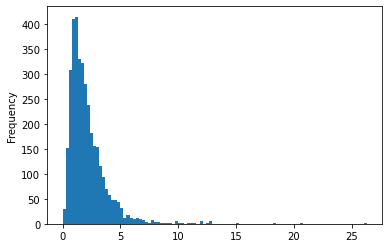

In [21]:
# Enter your code here
df_journals["avg_cites_per_paper"].plot.hist(bins=100)

## Box and whisker plots
Box and whisker plots are great for spoting outliers. Let's explore using a box and whisker plot.

>### Question 4
>#### Try
>The same way you've plotted the distribution, now make a box and whisker plot using the `boxplot` function ([documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot)) for the numerical feature "avg_cites_per_paper". 

<AxesSubplot:>

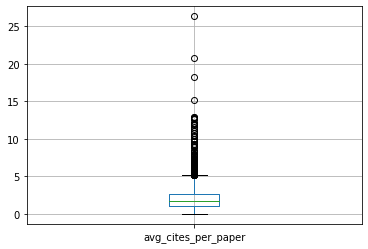

In [22]:
# Enter your code here
df_journals.boxplot(["avg_cites_per_paper"])

#### Learn 
Notice that the box and whisker plot helps to spot outliers.

#### Learn
Now, let's use a more interesting technique to remove outliers using the percentiles.

To print the percentiles of the dataset's numerical values, use the **.describe()** command.

In [23]:
df_journals.describe()

,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai
count,3615.000000,3615.000000,3615.000000,3615.000000
mean,1446.713850,509.671107,2.118970,0.516554
std,7983.573195,1920.708341,1.685032,0.571603
min,0.000000,1.000000,0.000000,0.000000
25%,151.000000,107.000000,1.056067,0.199000
50%,424.000000,240.000000,1.722628,0.368000
75%,1113.500000,520.500000,2.705021,0.649500
max,426949.000000,104705.000000,26.318824,11.367000


You will use the 25%, 50%, and 75% percentiles (or quartiles) as a guideline to remove the outliers.

For each feature, you will remove all data points outside the interquartile range (IQR), where:

$$IQR = 75\% \space quartile - 25\% \space quartile$$
$$Lower \space Threshold = 50\% \space percentile - 1.5 * IQR$$
$$Upper \space Threshold = 50\% \space percentile + 1.5 * IQR$$

The NumPy package has the `percentile` function ([documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html?highlight=percentile#numpy.percentile)) that can help you to get the threshold values.

>### Question 5 (Optional)
>##### Try
>**This question is optional and will not be graded**, but it is a nice way to exercise your curious side!

>Implement the following algorithm using the NumPy **percentile** function. 

#### Fix
Do the following for the "citation_count_sum" feature:
+ Use the guidelines and **percentile** function above to calculate the thresholds for each feature.
+ Remove the outliers outside this range for each feature.
+ Plot the box and whisker plot again to see the results.
+ Use the **shape** command before and after removal to see how many rows were removed.

Number of samples before: 3615
Number of samples after: 3066


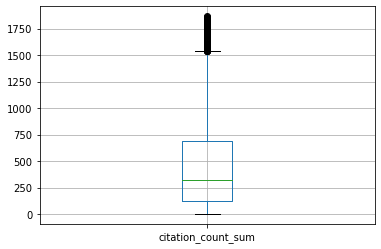

In [24]:
# Enter your code here
print("Number of samples before: {}".format(df_journals.shape[0]))
# Save the quartiles
citation_count_sum_25 = np.percentile(df_journals['citation_count_sum'], 25)
citation_count_sum_50 = np.percentile(df_journals['citation_count_sum'], 50)
citation_count_sum_75 = np.percentile(df_journals['citation_count_sum'], 75)

# Calculate the thresholds
IQR_citation_count_sum = citation_count_sum_75 - citation_count_sum_25
Lower_Limit = citation_count_sum_50 - IQR_citation_count_sum * 1.5
Upper_Limit = citation_count_sum_50 + IQR_citation_count_sum * 1.5

# Remove the outliers
df_journals = df_journals.loc[(df_journals['citation_count_sum'] > Lower_Limit) &
                              (df_journals['citation_count_sum'] < Upper_Limit)]
df_journals.boxplot(["citation_count_sum"])
print("Number of samples after: {}".format(df_journals.shape[0]))

#### Learn
Nice! You were successful in removing the outliers.

## Correlations: Multivariate statistics
#### Try
Use a correlation matrix for all features, plotting a scatter plot for each combination of numerical features in your dataset.

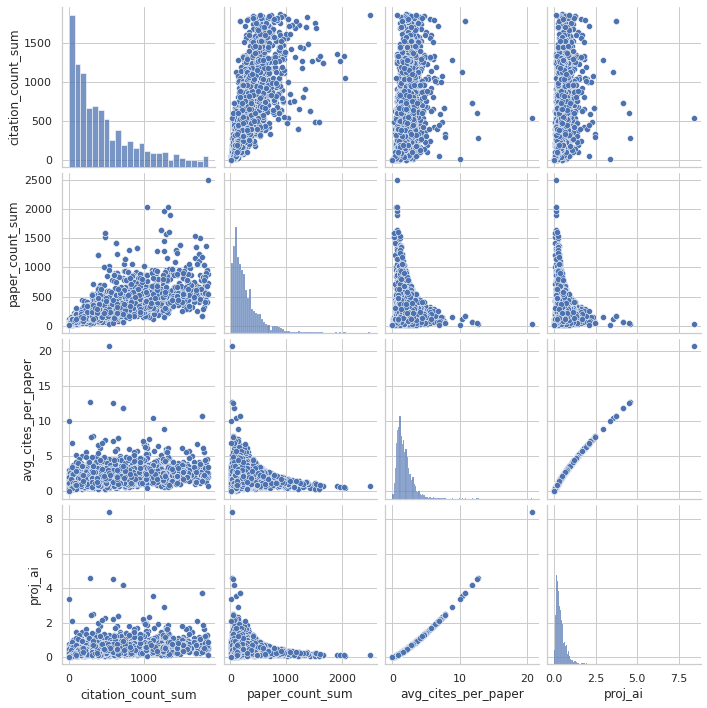

In [25]:
sns.set(style="whitegrid", context="notebook")
sns.pairplot(df_journals[["citation_count_sum", "paper_count_sum",
                        "avg_cites_per_paper","proj_ai"]])

#### Is it broken?
There is one highly correlated feature.

#### Learn
There is a strong nonlinear correlation between proj_ai x avg_cites_per_paper.
There is also some correlation between other variables here.
But we need numbers to make a decision whether to remove some highly correlated feature.
For this, a heat map with values is useful.

>### Question 6
>##### Try
>Use the `corr` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr)) in the df_journal dataframe to print the correlations.

In [26]:
# Enter your code here
corr = df_journals.corr()
corr

,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai
citation_count_sum,1.000000,0.726903,0.461533,0.412112
paper_count_sum,0.726903,1.000000,-0.027235,-0.042036
avg_cites_per_paper,0.461533,-0.027235,1.000000,0.987752
proj_ai,0.412112,-0.042036,0.987752,1.000000


##### Learn
Notice that the diagonal is always 1 (one), because it represents the variable against itself.

##### Is it broken?
The **proj_ai** and **avg_cites_per_paper** variables are highly correlated (over 99%). 

##### Fix
Let's try removing one of them. You will remove the **proj_ai** feature from the dataset.

In [27]:
del df_journals["proj_ai"]

#### Learn
Now, use another great tool, a `heatmap` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr)), to confirm the correlation between the variables and the target, after removing the correlation. 

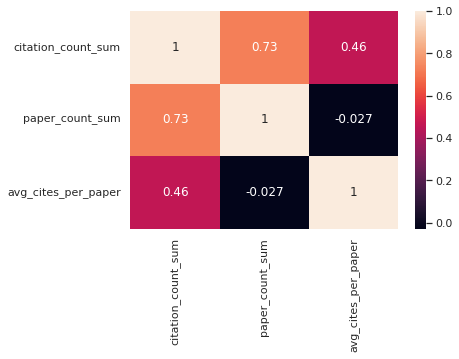

In [28]:
corr = df_journals.corr()
ax = sns.heatmap(corr, annot=True,)

## Conclusion

In this exercise, you practiced different ways to know your data.

You explored your data over several dimensions and views to bring your raw data to a state of processed data, ready to be used for your model.

You needed to understand a short business scenario and corresponding dataset. You analyzed the data using descriptive statistics to better understand it.

You used visualization tools, including box and whisker plots and histograms, to support this analysis and understand the distribution of your data. You applied multivariate statistics with the help of scatter plots to spot correlations between features.

In **question 1**, you discovered the importance of a first glance at your data. You looked at how many features there were and how many samples. You looked at the first lines to see if anything caught your attention, such as missing values.

In **question 2**, you learned and practiced how to decide whether to remove or impute missing values. In the case of imputation, you practiced how to handle numerical or categorical imputation.

**Questions 3** gave you an understanding of basic statistics that you can apply to your data. You practiced plotting the distribution of features.

For **question 4**, you practiced with another important plot for numerical features: the box and whisker plot. This is a great tool for spotting outliers. 

**Question 5** showed you an interesting guideline for removing outliers using percentiles. You were challenged to implement the algorithm.

Finally, in **question 6** you learned and practiced using multivariate techniques, such as a correlation matrix and scatter plot, to spot correlations between features and how to deal with that.

### Good work!
Now you have a dataset cleaned and ready to pass to the modeling step.
